# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Location
from shapely.geometry import Point
from geopandas import GeoDataFrame
import geopandas as gpd

import my_pickle as mp

import warnings
warnings.filterwarnings('ignore')

# Read in data

In [3]:
user_df = mp.unjson_it('data_user')
user_df = mp.reinstate_date(user_df,['activeAt', 'available', 'birthday','created','updated'])

convo_df = mp.unjson_it('data_convo')
message_df = mp.unjson_it('data_message') 
master_df = mp.unjson_it('data_master')

print("Make sure we're not using ECT data")
print(convo_df.timestamp.max())

Make sure we're not using ECT data
2017-10-02 01:35:58.644000


# AVERAGE MESSAGES SENT AND RECIEVED

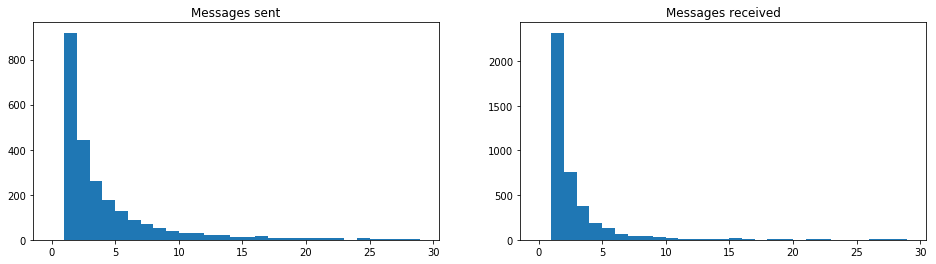

Out of 10937 messages:
 - users who sent messages sent 4.495 on average
 - users who received messages received 2.646 on average


Out of 25738 onboarded users:
 - 2433 unique users sent messages
 - 4133 unique users received messages
 - 5655 unique users sent or received messages
 - 911 unique users sent and received messages


In [73]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
ax1.hist(convo_df.groupby('uid_sender').count().my_count,bins = range(30))
ax1.set_title('Messages sent')

ax2 = fig.add_subplot(122)
ax2.hist(convo_df.groupby('uid_receiver').count().my_count,bins = range(30))
ax2.set_title('Messages received')
ax2.set_title('Messages received')
plt.show()

print("Out of {} messages:".format(convo_df.groupby('uid_sender').count().my_count.sum()))
print(" - users who sent messages sent {:.4} on average".format( 
            convo_df.groupby('uid_sender').count().my_count.mean()))

print(" - users who received messages received {:.4} on average".format(
            convo_df.groupby('uid_receiver').count().my_count.mean()))
print("\n")
print("Out of {} onboarded users:".format(len(user_df)))
print(" - {} unique users sent messages".format(len(convo_df.uid_sender.unique())))
print(" - {} unique users received messages".format(len(convo_df.uid_receiver.unique())))
      
      
either = len(set(convo_df.uid_sender).union(set(convo_df.uid_receiver)))
both = len(set(convo_df.uid_sender).intersection(set(convo_df.uid_receiver)))
print(" - {} unique users sent or received messages".format(either))
print(" - {} unique users sent and received messages".format(both))

# LENGTH OF CONVERSATION

In [49]:
grouped = message_df.groupby('conversation_id').count().const

print("{} messages were sent".format(grouped.sum()))
print("The longest conversation was {} messages".format(grouped.max()))
print("On average, conversations lasted {:.3} messages".format(grouped.mean()))

20497 messages were sent
The longest conversation was 248 messages
On average, conversations lasted 1.79 messages


# COST RANGE

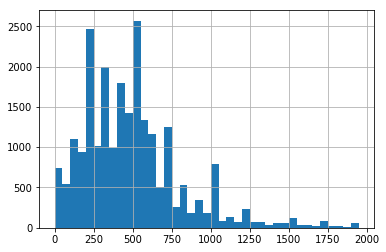

In [52]:
user_df['cost_range'] = user_df.maxCost-user_df.minCost
user_df.cost_range.hist(bins=range(0,2000,50))
plt.show()

# NUM ROOMMATES

In [ ]:
x = user_df.groupby('numRoommates').created.count().index
y = user_df.groupby('numRoommates').created.count().values
plt.bar(x, y)
plt.xlim(0,11)

# CONVERSATIONS

### basic info

In [30]:
print("There are {} conversation.".format(len(convo_df)))

There are 10937 conversation.


In [31]:
response_rate = convo_df.response.sum()/len(convo_df)
print("Messages get responses {:.2} of the time.".format(response_rate))

Messages get responses 0.11 of the time.


# USERS

### CREATED

In [ ]:
user_df.created.hist(figsize=(16,2), bins=100);

In [ ]:
user_df.updated.hist(figsize=(16,2), bins=100);

### TIME FROM CREATED TO UPDATED

In [ ]:
user_df["update-created"] = user_df.updated-user_df.created
# user_df["update-created"] = user_df["update-created"].apply(lambda x: pd.to_datetime(x*100000000))
user_df["update-created"] = user_df["update-created"].apply(lambda x: x.days)
user_df["update-created"].hist()

### ABOUT

#### length

In [ ]:
user_df.len_about.hist(bins=range(1, 1000, 10), figsize = [10, 3])
plt.title("Lenght of 'about' Section")
plt.tight_layout()

#### percent responding

In [ ]:
wth = user_df[user_df.len_about > 0].count()['about']
wthout = user_df[user_df.len_about == 0].count()['about']
print('total number of user entries: {}'.format(wth+wthout))
print('number with about sections: {}'.format(wth))
print('number without about sections: {}'.format(wthout))
print('percent with about sections: {}'.format(wth/(wth+wthout)))

In [ ]:
user_df[user_df.len_about>0].about.values

### BIRTHDAY

In [ ]:
user_df.age.hist(bins=range(16,100), figsize=(16,2));

### LOCATION

In [ ]:
user_df.location[0][0]

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [ ]:
user_df.location = user_df.location.apply(lambda x: x if isinstance(x, list) else [0,0])

In [ ]:
geometry = [Point(xy) for xy in user_df.location]
loc_df = user_df.location
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(loc_df, crs=crs, geometry=geometry)


# geometry = [Point(xy) for xy in zip(user_df.longitude, user_df.latitude)]
# loc_df = user_df[['longitude', 'latitude']]
# crs = {'init': 'epsg:4326'}
# gdf = GeoDataFrame(loc_df, crs=crs, geometry=geometry)

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

''' OPTION TWO
base = world.plot(color='white', edgecolor='black', figsize = (16,10))
gdf.plot(ax=base, marker='o', color='#FF00FF', markersize=5);
''';

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')
ax.set_xlim([-126, -67])
ax.set_ylim([24, 50])

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

''' OPTION TWO
base = world.plot(color='white', edgecolor='black', figsize = (16,10))
gdf.plot(ax=base, marker='o', color='#FF00FF', markersize=5);
''';

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')
ax.set_xlim([-122.8, -121.5])
ax.set_ylim([37, 38.2])

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')
ax.set_xlim([-80, -70])
ax.set_ylim([40, 45])

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

In [ ]:
master_df = mp.unjson_it('data_master')
master_df['const'] = 1

In [ ]:
messages_with_responses.groupby('first_uid').const.count().mean()

In [ ]:
messages_without_responses.groupby('first_uid').const.count().mean()

In [ ]:
master_df.groupby('first_uid').const.count().mean()

# CONVERSATION LENGTH

In [ ]:
master_df

# COMPARE RESPONSE RATES

In [ ]:
# separate dataset into with and without responses
messages_with_responses = master_df[master_df.response == 1]
messages_without_responses = master_df[master_df.response == 0]

In [ ]:
messages_with_responses.columns

In [ ]:
# fn to display plot
def plot_feature(col, bins=None):
    with_resp = messages_with_responses[col].hist(figsize = (16,4), bins = bins, normed=True, alpha = .5)
    without_rest = messages_without_responses[col].hist(figsize = (16,4), bins = bins,normed=True, alpha = .3, color='r')
    
    plt.xlabel(col,fontsize=14)
    plt.ylabel('Number of Messages',fontsize=14)
    plt.legend(['Response',"No Response"])
    plt.show()
    print(col+" with response: {:.9f}".format(messages_with_responses[col].mean()))
    print(col+" without response: {:.9f}\n\n".format(messages_without_responses[col].mean()))

# LENGTH OF ABOUT

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('len_about_sender', range(1, 2000, 50))
plot_feature('len_about_receiver', range(1, 2000, 50))

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('sentence_ratio_sender')
plot_feature('sentence_ratio_receiver')

# AGE OF RESPONDENTS

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('age_sender',range(16,60))
plot_feature('age_receiver',range(16,60))

# MAX COST

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('maxCost_sender')
plot_feature('maxCost_receiver')

# HOBBIES OVERLAP

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('hobbies_overlap')

# AGE DIFFERENCE

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('age_dif', range(40))

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('type_sender',range(0,3))
plot_feature('type_receiver',range(0,3))

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('isStudent_sender',range(0,3))
plot_feature('isStudent_receiver',range(0,3))

# MIN COST

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('minCost_sender',range(0,2000,50))
plot_feature('minCost_receiver',range(0,2000,50))

# LEN OF FIRST MESSAGE

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('first_len', range(0,500, 10))